In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

In [5]:
df.size

14350

In [7]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
952,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
868,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1


In [10]:
df.age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

df.isna().count()
It include both NaN and Non NaN columns

In [19]:
df.isna().count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
df.target.unique()

array([0, 1])

In [18]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
222,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [24]:
df.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1025 entries, 0 to 1024
Series name: target
Non-Null Count  Dtype
--------------  -----
1025 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


In [26]:
df.target.nunique()

2

In [60]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [29]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [30]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [31]:
x = df.drop("target",axis="columns")
y = df["target"]

In [32]:
x = scaler.fit_transform(x)

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
my_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [68]:
model = keras.Sequential([
    keras.layers.Dense(2*x.shape[1],input_shape=(x.shape[1],),activation="relu"),
    keras.layers.LayerNormalization(
    axis=-1,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
),
    keras.layers.Dense(x.shape[1],activation="relu"),
    # Here we have added Normalization layer. Means after every output of layer
    # We then Normalize the output and then transfer to the next layer
    keras.layers.LayerNormalization(
    axis=-1,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=my_callback,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 33ms/step - loss: 0.7323 - accuracy: 0.6061 - val_loss: 0.5285 - val_accuracy: 0.6976
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7634 - val_loss: 0.4357 - val_accuracy: 0.7854
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4227 - accuracy: 0.8000 - val_loss: 0.4113 - val_accuracy: 0.7951
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8195 - val_loss: 0.3967 - val_accuracy: 0.8244
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8329 - val_loss: 0.3939 - val_accuracy: 0.8341
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3597 - accuracy: 0.8439 - val_loss: 0.3876 - val_accuracy: 0.8390
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8598 - val_loss: 0.3913 - val_accuracy: 0.8439


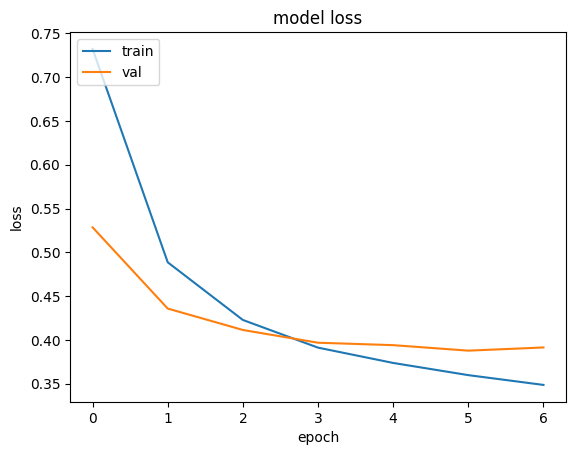

In [69]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [70]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8439


[0.3912772238254547, 0.8439024686813354]

In [71]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [72]:
y_pred[:5]
y_pred.shape

(205, 1)

In [73]:
y_pred[0][0]

0.95822614

In [74]:
y_pred = y_pred.reshape(-1)

In [75]:
y_pred[0]

0.95822614

In [76]:
y_predict = []

for i in  y_pred:
  if i < 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)

In [77]:
y_predict[:5]

[1, 1, 0, 1, 0]

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       102
           1       0.81      0.89      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



Text(95.72222222222221, 0.5, 'Truth')

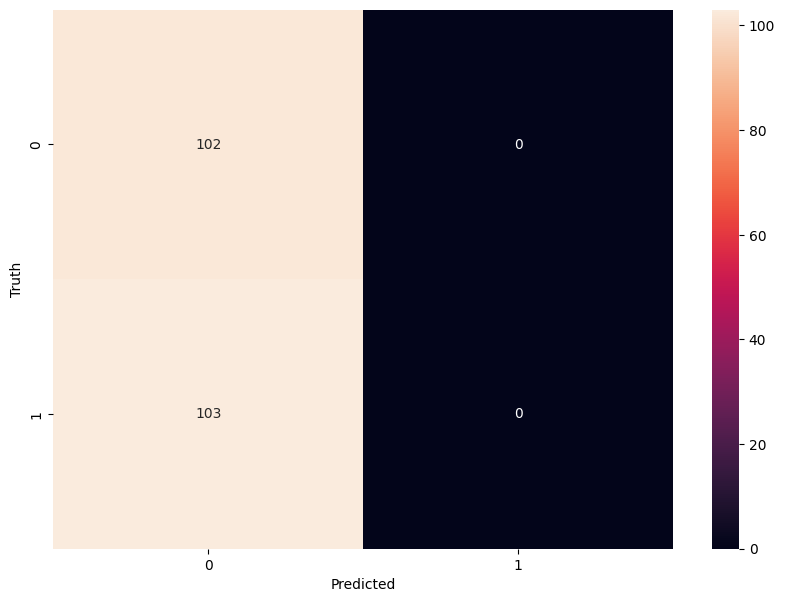

In [79]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
y_test.value_counts()

1    103
0    102
Name: target, dtype: int64